Scanpy data loading tutorial from
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [89]:
import numpy as np
import pandas as pd
import scanpy as sc

1. Load the data into an AnnData Object

In [90]:
# Set read/write directories
input_folder = 'data/filtered_gene_bc_matrices/hg19/'
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [91]:
# Create AnnData object from cahced file
adata=sc.read_h5ad(results_file)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [92]:
# Compute neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [93]:
# Run UMAP
sc.tl.leiden(adata) # Generate clusters for paga graph
sc.tl.paga(adata) # Creates a course-grained manifold strucutre prior to UMAP
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


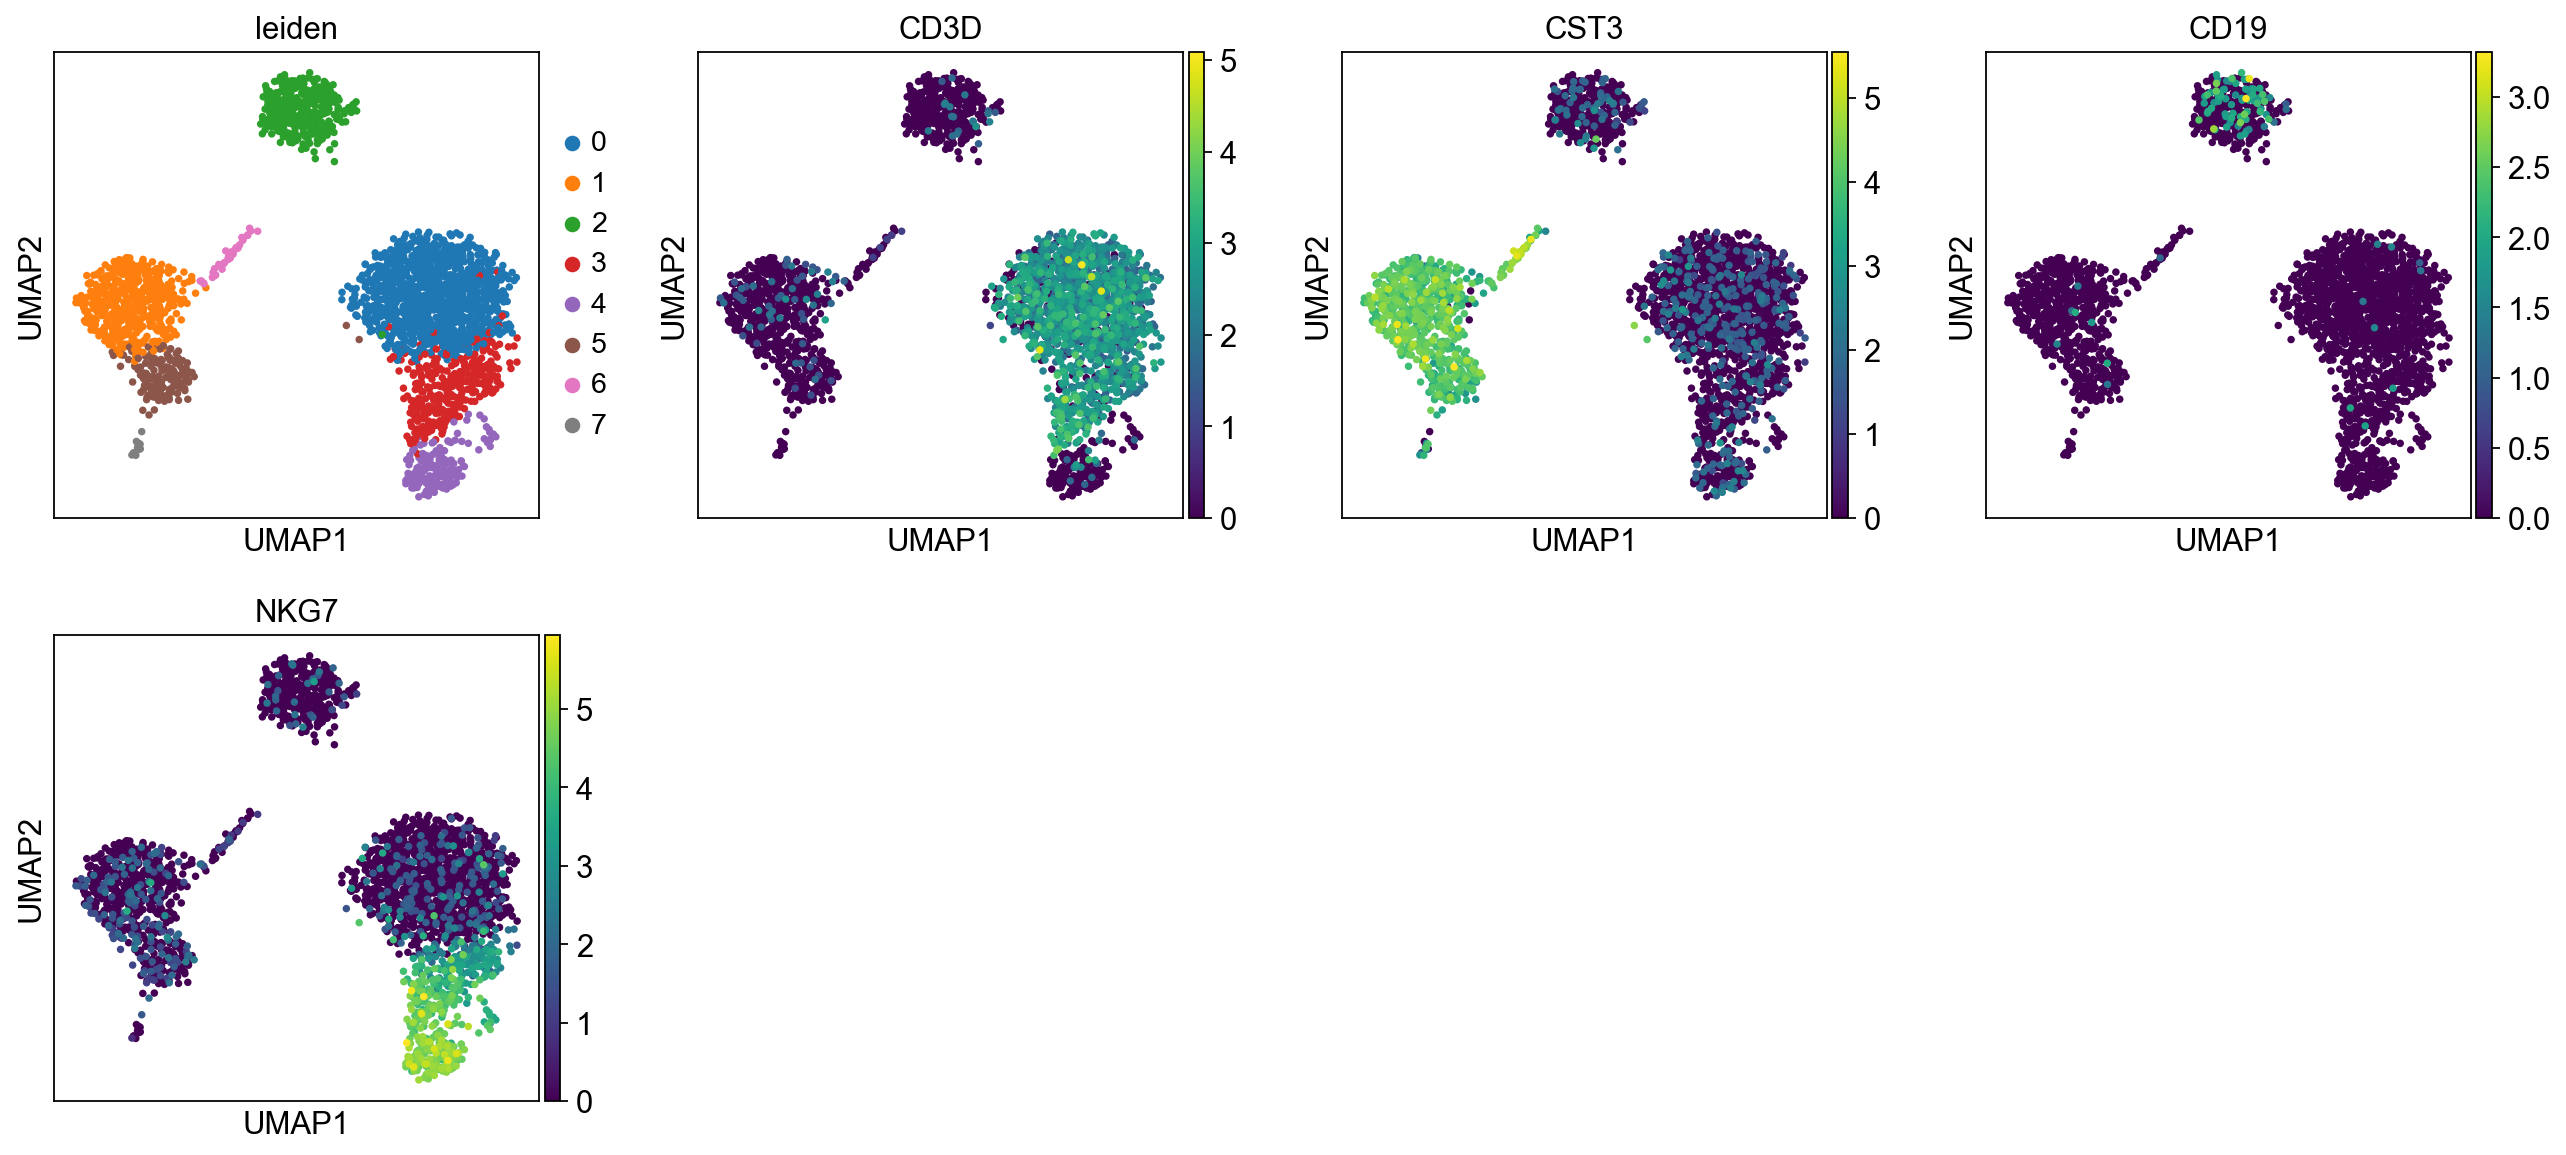

In [94]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden','CD3D','CST3','CD19', 'NKG7']) # Markers for T cells, monoctyes/DC, B cells and NK cells

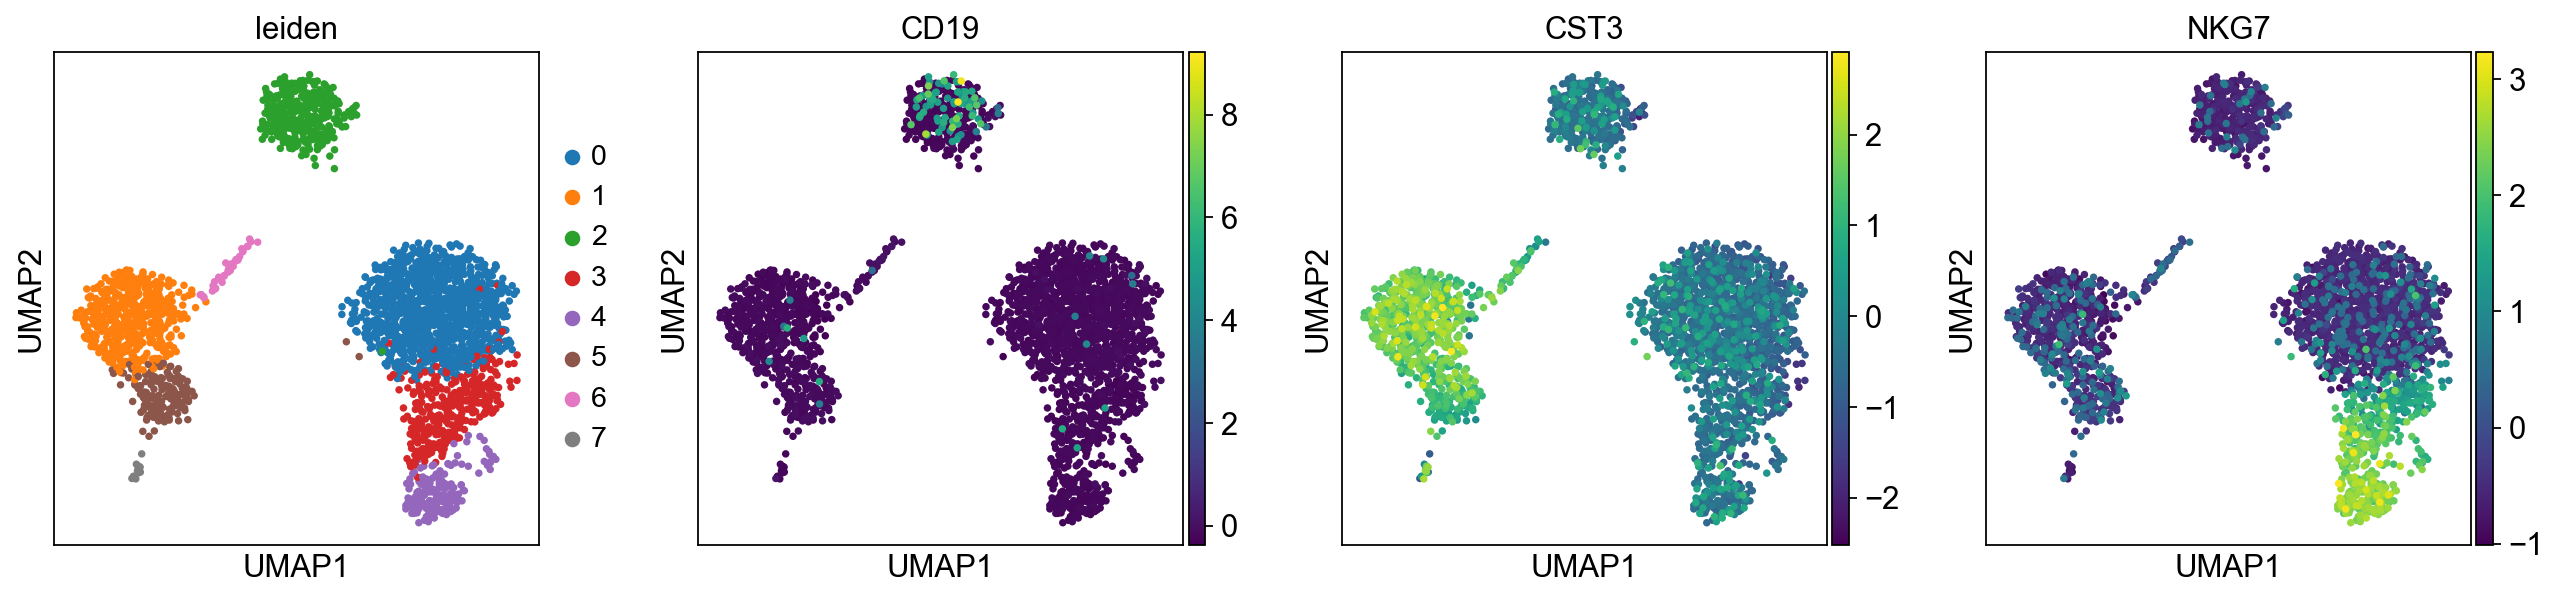

In [95]:
# Run on unocrrected samples
sc.pl.umap(adata, use_raw=False, color=['leiden','CD19','CST3', 'NKG7']) # Markers for T cells, CD4+, Macrophage, B cells, Monocytes(?), NK cells

In [96]:
adata.write(results_file)

In [97]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'